## Topic: Digit Recognizer
The following code is for [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer/overview)    
### Results:   
accuracy (best) = 0.97335


In [28]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
# The directory in which the .ipynb file is located
working_directory = os.getcwd()


(42000, 784) (42000,)


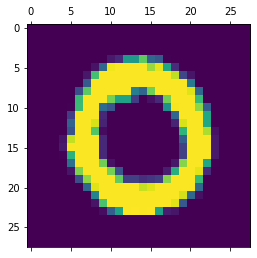

In [29]:
# please note that this file, train.csv, test.csv should be in same directory
path=working_directory+'/train.csv'

# storing the input from train.csv to Data using pandas
Data=pd.read_csv(path)
# converting the Data to a numpy array
numpyData=Data.to_numpy()

# label is the first column
label=numpyData[:,0]
# rest of the columns are for data points (brightness of pixel)
input=numpyData[:,1:]

# Reducing the value of data points from 0-255 to 0-1
input=input/255
print(input.shape,label.shape)

# sample of how the image looks like
plt.matshow(numpyData[1,1:].reshape(28,28))

### Why reduce the value of range of brightness of each pixel
The model suits better when the input nodes are small.   
It can be explained in the following manner,   
Lets say $\alpha$ is set of optimal parameters in original input case (input layer to hidden layer), in the reduced pixel brightness case, it would be $0.01*\alpha$. Now if alpha is already small, for same learning rate as in reduced case, it would cause the parameters to overshoot, while a lower or decaying learning rates may still not be a solution because it may cause the model training to slow down 


In [30]:
# We are using one hidden layer with 80 nodes
# I tested for 50,75,80,100,125,400 There wasn't much difference in performance
# I went for lower value as it wouldn't cause model to over fit
# I took tanh activation function from input to hidden because it gave better results than sigmoid
# another thing is ReLu gave overfitting
# using ReLu/tanh for hidden to output layer activation caused underfitting
model = keras.Sequential([
    keras.layers.Dense(80, input_shape=(784,), activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Among adam, adamax, sgd, nadam . The best reults were given by adam
# I tried mean squared error, sparse categorical cross entropy,
# the latter produced better result
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# I tried epoch = 5, 7 , 10, 15.
# They produced similar results
model.fit(input, label, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.9057
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9495
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1259 - accuracy: 0.9640
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0973 - accuracy: 0.9716
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0790 - accuracy: 0.9777
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0631 - accuracy: 0.9825
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0513 - accuracy: 0.9858
Epoch 8/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0428 - accuracy: 0.9883
Epoch 9/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0344 - accuracy: 0.9907
Epoch 10/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.027

(28000, 784)


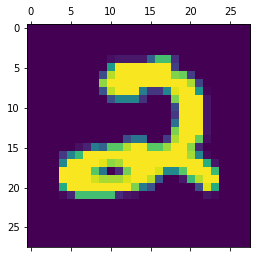

In [31]:
# now for test.csv
path_test=working_directory+'/test.csv'
# storing the input from test.csv in Test_Data
Test_Data=pd.read_csv(path_test)

# Creating a numpy array for test data
numpyData_test=Test_Data.to_numpy()


input_test=numpyData_test[:,:]

# Reducing the value in input_test
input_test=input_test/255

print(input_test.shape)

# here is one of the images in test.csv 
plt.matshow(numpyData_test[0,:].reshape(28,28))
predicted=model.predict(input_test)

# The predicted label is the one which has largest value in output node
# the output nodes with index i (i=0 to 9) represent same integer
predicted=np.argmax(predicted,axis=1)

# convert array into dataframe
index=np.linspace(1,28000,28000)
DF = pd.DataFrame(predicted,index)
DF.columns=['Label']
DF.rename(columns={'':'ImageID'},inplace = True)
# save the dataframe as a csv file
DF.to_csv("predicted.csv")

In [32]:
#Training loss, accuracy
model.evaluate(input,label)

1313/1313 [==============================] - 2s 1ms/step - loss: 0.0204 - accuracy: 0.9960


[0.020403537899255753, 0.9960238337516785]